In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# importing libraries
from nltk.tokenize import word_tokenize,sent_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,LancasterStemmer
#from contractions import fix
#from unidecode import unidecode
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, StratifiedKFold
import pandas
from tqdm import tqdm
tqdm.pandas()
from wordcloud import WordCloud
from gensim.models import Word2Vec,doc2vec

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.svm import SVC,SVR

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.pairwise import cosine_similarity



from gensim.models import Word2Vec, KeyedVectors

path = "../GoogleNews-vectors-negative300.bin"
word2vec_model = KeyedVectors.load_word2vec_format(path, binary=True)

word2vec_model

In [3]:
print(word2vec_model.vector_size)

print(word2vec_model['good'])
print(word2vec_model['bad'])

300
[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891  0.08496094  0.23535156 -0.10107422 -0.03564453
 -0.04736328  0.04736328 -0.14550781 -0.10986328  0.14746094 -0.23242188
 -0.07275391  0.19628906 -0.37890625 -0.07226562  0.04833984  0.11914062
  0.06103516 -0.12109375 -0.27929688  0.05200195  0.04907227 -0.02709961
  0.1328125   0.03369141 -0.32226562  0.04223633 -0.08789062  0.15429688
  0.09472656  0.10351562 -0.02856445  0.00128174 -0.

In [4]:
import nltk
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define a function for data cleansing
def preprocess_text(text):
    # Tokenize and lowercasing
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords]
    return tokens

# Function to compute average vector of words in a sentence
def sentence_to_vector(sentence, model, vector_size=300):
    vectors = [model[word] for word in sentence if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Read data and extract third column
data_path = '../liar_dataset/train.tsv'
data = pd.read_csv(data_path, sep='\t', header=None)
news_texts = data[2]  # Assuming third column contains the news text

# Process each piece of news and compute average vectors
vectorized_news = []

for news in news_texts:
    # Clean and tokenize the text
    cleaned_tokens = preprocess_text(news)
    # Compute the average vector for the news
    avg_vector = sentence_to_vector(cleaned_tokens, word2vec_model)
    vectorized_news.append(avg_vector)

# Convert to a NumPy array for a vector of vectors
vectorized_news = np.array(vectorized_news)

# Display the shape of the vectorized news data
print("Shape of vectorized news:", vectorized_news.shape)

print(vectorized_news[0])



[nltk_data] Downloading package punkt to /Users/nickli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nickli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nickli/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Shape of vectorized news: (10240, 300)
[-3.74952033e-02  6.84465701e-03  3.81033756e-02  6.12444207e-02
 -9.08317566e-02 -7.98688605e-02  2.16238829e-03 -6.09654002e-02
  1.29669189e-01 -2.17372347e-02 -3.74930240e-02 -6.78362185e-03
  1.57841276e-02  1.25767305e-01 -1.27929688e-01  1.19785853e-01
  6.41217902e-02  9.67494398e-02 -9.86328125e-02 -1.50565013e-01
  8.32890123e-02  7.17947856e-02 -7.13588148e-02  2.70385742e-02
 -5.65708689e-02 -7.24574476e-02 -4.41981740e-02 -2.53731874e-03
 -7.68171027e-02 -9.47974101e-02  7.74972066e-02 -7.96726812e-03
 -8.79255012e-02  5.96749447e-02  4.29774709e-02 -7.69042969e-02
  5.73730469e-03  1.36718750e-01 -1.66538786e-02 -3.17993164e-02
  1.11633301e-01  2.65284944e-02  1.10177174e-01 -3.57840396e-02
 -1.02015905e-01 -1.25069752e-01 -8.05664062e-03  5.72335385e-02
 -8.32170770e-02  7.08879754e-02  8.96344855e-02 -1.55264720e-01
 -9.93477926e-02  9.59123857e-03  1.96881983e-02 -2.21819188e-02
 -3.96728516e-02 -3.46897654e-02 -2.97677182e-02 -3

(10240,)
(10240, 300)
Testing with 5000 iterations, 0.1 lr
Loose_Train Loose Accuracy: 61.31%
Loose_Test Loose Accuracy: 61.72%
Train Accuracy: 27.89%
Test Accuracy: 23.99%


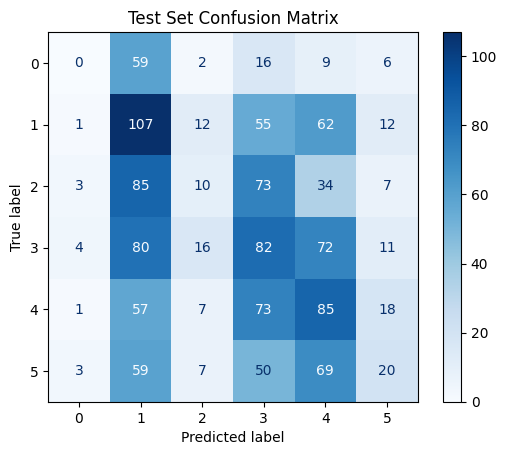

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Run softmax regression

# Map from class to int
label_mapping = {
    "false": 1,
    "barely-true": 2,
    "half-true": 3,
    "mostly-true": 4,
    "true": 5,
    "pants-fire": 0
}
def predict(w, X):
    return np.argmax(X @ w, axis=1)

# Assuming you have the true labels (y) and predicted labels (y_preds)
def plot_confusion_matrix(y_true, y_preds, labels, title="Confusion Matrix"):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_preds, labels=labels)
    
    # Plot the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues")
    plt.title(title)
    plt.show()



def evaluate(w, X, y, name):
    """Measure and print RMSE of a predictor on a dataset."""
    y_preds = predict(w, X)
    rmse = np.sqrt(np.mean((y_preds - y)**2))
    print('    {} RMSE: {}'.format(name, rmse))
    return rmse

def evaluate_accuracy(w, X, y, name):
    y_preds = predict(w, X)
    accuracy = np.mean(y_preds == y)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    return accuracy

def eval_loose_accuracy(w, X, y, name):
    y_preds = predict(w, X)
    within_one = (y_preds == y) | (y_preds == y - 1) | (y_preds == y + 1)
    accuracy = np.mean(within_one)
    print(f'{name} Loose Accuracy: {accuracy * 100:.2f}%')
    return accuracy

def train_gradient_descent(x_train, y_train, lr=0.1, num_iters=5000):
    N,D = x_train.shape # expecting (10240, 300)
    w = np.zeros((D, 6))
    denoms = np.sum(np.exp(x_train @ w), axis = 1)
    for k in range(1):
        for i in range(num_iters):
            for j in range(6):
                prob = np.exp(x_train @ w[:,j]) / denoms
                grad = (1/N) * ((prob - (y_train==j))[:, np.newaxis] * x_train).sum(axis=0)
                w[:, j] -= lr * grad
        print(f'Testing with {(k+1) * num_iters} iterations, {lr} lr')
        # Read data and extract third column
        data_path = '../liar_dataset/test.tsv'
        data = pd.read_csv(data_path, sep='\t', header=None)
        news_texts = data[2]  # Assuming third column contains the news text

        # Process each piece of news and compute average vectors
        vectorized_news_test = []

        for news in news_texts:
            # Clean and tokenize the text
            cleaned_tokens = preprocess_text(news)
            # Compute the average vector for the news
            avg_vector = sentence_to_vector(cleaned_tokens, word2vec_model)
            vectorized_news_test.append(avg_vector)

        # Convert to a NumPy array for a vector of vectors
        vectorized_news_test = np.array(vectorized_news_test)

        # Import data, convert class to 0-4 scale
        raw_data = pd.read_csv('../liar_dataset/test.tsv', sep='\t', header=None)
        y_test = raw_data.iloc[:, 1].map(label_mapping).to_numpy() # 2nd row -> categories
        x_test = vectorized_news_test
        train_rmse = eval_loose_accuracy(w, x_train, y_train, 'Loose_Train')
        test_rmse = eval_loose_accuracy(w, x_test, y_test, 'Loose_Test')
    return w

# Import data, convert class to 0-4 scale
raw_data = pd.read_csv('../liar_dataset/train.tsv', sep='\t', header=None)
y_train = raw_data.iloc[:, 1].map(label_mapping).to_numpy() # 2nd row -> categories
x_train = vectorized_news
print(y_train.shape)
print(x_train.shape)

w = train_gradient_descent(x_train, y_train)

train_rmse = evaluate_accuracy(w, x_train, y_train, 'Train')
# dev_rmse = evaluate(w, X_dev, y_dev, 'Dev')
# train_rmses.append(train_rmse)
# dev_rmses.append(dev_rmse)
test = True
if test == True:
    # Read data and extract third column
    data_path = '../liar_dataset/test.tsv'
    data = pd.read_csv(data_path, sep='\t', header=None)
    news_texts = data[2]  # Assuming third column contains the news text

    # Process each piece of news and compute average vectors
    vectorized_news_test = []

    for news in news_texts:
        # Clean and tokenize the text
        cleaned_tokens = preprocess_text(news)
        # Compute the average vector for the news
        avg_vector = sentence_to_vector(cleaned_tokens, word2vec_model)
        vectorized_news_test.append(avg_vector)

    # Convert to a NumPy array for a vector of vectors
    vectorized_news_test = np.array(vectorized_news_test)

    # Import data, convert class to 0-4 scale
    raw_data = pd.read_csv('../liar_dataset/test.tsv', sep='\t', header=None)
    y_test = raw_data.iloc[:, 1].map(label_mapping).to_numpy() # 2nd row -> categories
    x_test = vectorized_news_test
    test_rmse = evaluate_accuracy(w, x_test, y_test, 'Test')

    # Use the function with your test set predictions
    y_preds = predict(w, x_test)  # Get predictions on test set
    plot_confusion_matrix(y_test, y_preds, labels=[0, 1, 2, 3, 4, 5], title="Test Set Confusion Matrix")


